In [30]:
# Title of the paper: Snapping Back: Food Stamps Bans and Criminal Recidivism
# Name: Edith Laeticia Simo Chemo

In [8]:
# Load packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from pandas import concat
from matplotlib.pyplot import subplots
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, lasso_path, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [9]:
################################ DATA ##################################

In [10]:
# Import data
data = pd.read_stata("updated_fl.dta")

# Convert Categorical variables: List of categorical columns
categorical_cols = ['race','sex','custody_description','county1']

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    data[col+ '_encoded'] = le.fit_transform(data[col])
    
# Select columns
data = data.select_dtypes(include=['number'])

In [11]:
# Remove missing observations
data = data.dropna()
data.shape

(129531, 83)

In [12]:
# Define variables
X = data.drop(columns = ["anyrecid","distn3","distn4","finrecidany","nonfinrecidany"])
Y = data["anyrecid"]

In [13]:
print(X.columns)

Index(['index', 'date', 'adate', 'rdate', 'releaseyear', 'releasemonth',
       'after', 'dist', 'distnoab', 'distn2', 'fullbanafter', 'fullbanbefore',
       'concurrent_sentence', 'drugoffense', 'traffoffense', 'otheroffense',
       'smd', 'traffmar', 'traffcoc', 'traffher', 'traffamph', 'traffill',
       'traffconspir', 'fincrime', 'notpossoffense', 'drugoffense_noselling',
       'drugoffense_poss', 'violentcrime', 'assault', 'elderly', 'escape',
       'forgery', 'fraud', 'kidnap', 'manslaughter', 'murder', 'othercrime',
       'otherviolent', 'propdamage', 'racketeer', 'robbery', 'sexcrime',
       'propsteal', 'weapon', 'criminalmischief', 'dui', 'licrevoke',
       'fleeorescape', 'fraudforge', 'anytheft', 'anyburg', 'propcrime',
       'birthyear', 'maxdate', 'maxadate', 'maxrdate', 'dateorig',
       'offenseyear', 'offensemonth', 'ban', 'age', 'under30', 'black', 'male',
       'totalyearssentenced', 'prioroffensenumber', 'prioroffense',
       'countoffenses', 'preoct97',

In [14]:
############################ OLS REGRESSION #############################

In [15]:
# Fit OLS
model = sm.OLS(Y,X).fit()

In [16]:
# Generate a LaTex output for the regression table
latex_output = model.summary().as_latex()
print(latex_output)

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}                &     anyrecid     & \textbf{  R-squared:         } &     0.200   \\
\textbf{Model:}                        &       OLS        & \textbf{  Adj. R-squared:    } &     0.200   \\
\textbf{Method:}                       &  Least Squares   & \textbf{  F-statistic:       } &     588.4   \\
\textbf{Date:}                         & Sun, 20 Oct 2024 & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}                         &     21:01:51     & \textbf{  Log-Likelihood:    } &   -75214.   \\
\textbf{No. Observations:}             &      129531      & \textbf{  AIC:               } & 1.505e+05   \\
\textbf{Df Residuals:}                 &      129475      & \textbf{  BIC:               } & 1.511e+05   \\
\textbf{Df Model:}                     &          55      & \textbf{                     } &             \\
\textbf{Covariance Type:}              &    nonrobust     & \textbf{                     }

In [17]:
################################ RIDGE ####################################

In [18]:
# Load packages
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error as mse

In [19]:
# Standardize variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
import warnings

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Set up a range of lambdas
    lambdas = 10**np.linspace(5, -5, 100) / Y.std()
    soln_array = skl.ElasticNet.path(X_scaled,
                                     Y,
                                     l1_ratio=0,
                                     alphas=lambdas)[1]
    print(soln_array.shape)

(78, 100)


In [21]:
# Transform Soln_path into a dataframe
soln_path = pd.DataFrame(soln_array.T,
                         columns=X.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,index,date,adate,rdate,releaseyear,releasemonth,after,dist,distnoab,distn2,...,preoct97,placebodrug,placebosmd,year,month,unemp_rate,race_encoded,sex_encoded,custody_description_encoded,county1_encoded
negative log(lambda),,,,,,,,,,,,,,,,,,,,,
-12.239637,-2.172432e-09,-7.088742e-07,-7.899913e-07,-8.088265e-07,-8.073704e-07,1.856335e-09,-1.560154e-07,-7.109141e-07,-7.088742e-07,-7.211296e-07,...,0.0,0.0,2.036235e-08,-8.073704e-07,1.856335e-09,-4.122437e-07,-3.429159e-07,2.490409e-07,6.039700e-08,-4.676573e-09
-12.007053,-2.741286e-09,-8.944821e-07,-9.968402e-07,-1.020608e-06,-1.018770e-06,2.342262e-09,-1.968641e-07,-8.970562e-07,-8.944821e-07,-9.099473e-07,...,0.0,0.0,2.569367e-08,-1.018770e-06,2.342262e-09,-5.201837e-07,-4.327074e-07,3.142521e-07,7.621186e-08,-5.900595e-09
-11.774469,-3.459091e-09,-1.128683e-06,-1.257845e-06,-1.287836e-06,-1.285518e-06,2.955334e-09,-2.484064e-07,-1.131932e-06,-1.128683e-06,-1.148199e-06,...,0.0,0.0,3.242061e-08,-1.285518e-06,2.955334e-09,-6.563833e-07,-5.460094e-07,3.965382e-07,9.616766e-08,-7.444798e-09
-11.541884,-4.364847e-09,-1.424197e-06,-1.587180e-06,-1.625026e-06,-1.622100e-06,3.728786e-09,-3.134406e-07,-1.428296e-06,-1.424197e-06,-1.448825e-06,...,0.0,0.0,4.090838e-08,-1.622100e-06,3.728786e-09,-8.282393e-07,-6.889772e-07,5.003697e-07,1.213485e-07,-9.392824e-09
-11.309300,-5.507762e-09,-1.797070e-06,-2.002730e-06,-2.050487e-06,-2.046796e-06,4.704521e-09,-3.954969e-07,-1.802242e-06,-1.797070e-06,-1.828149e-06,...,0.0,0.0,5.161768e-08,-2.046796e-06,4.704521e-09,-1.045084e-06,-8.693769e-07,6.313874e-07,1.531225e-07,-1.185010e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.855876,-8.913412e-04,2.375011e-02,-1.151217e-01,-1.013069e-01,5.274689e-02,2.694894e-03,1.257591e-03,1.733949e-02,4.560815e-02,-1.235646e-01,...,0.0,0.0,1.054329e-03,2.617972e-02,1.901369e-03,3.735412e-03,-6.909026e-03,1.220083e-02,1.744517e-03,4.560724e-03
10.088461,-8.914437e-04,2.063669e-02,-1.158675e-01,-1.087697e-01,6.257897e-02,3.257133e-03,1.211799e-03,1.597215e-02,4.459576e-02,-1.235900e-01,...,0.0,0.0,1.045416e-03,3.166530e-02,2.281734e-03,3.734331e-03,-6.872225e-03,1.220665e-02,1.744323e-03,4.559807e-03
10.321045,-8.915547e-04,1.737129e-02,-1.165038e-01,-1.164560e-01,7.277118e-02,3.842776e-03,1.170866e-03,1.473572e-02,4.335077e-02,-1.236096e-01,...,0.0,0.0,1.029767e-03,3.721060e-02,2.664696e-03,3.733489e-03,-6.840886e-03,1.220752e-02,1.744087e-03,4.558964e-03


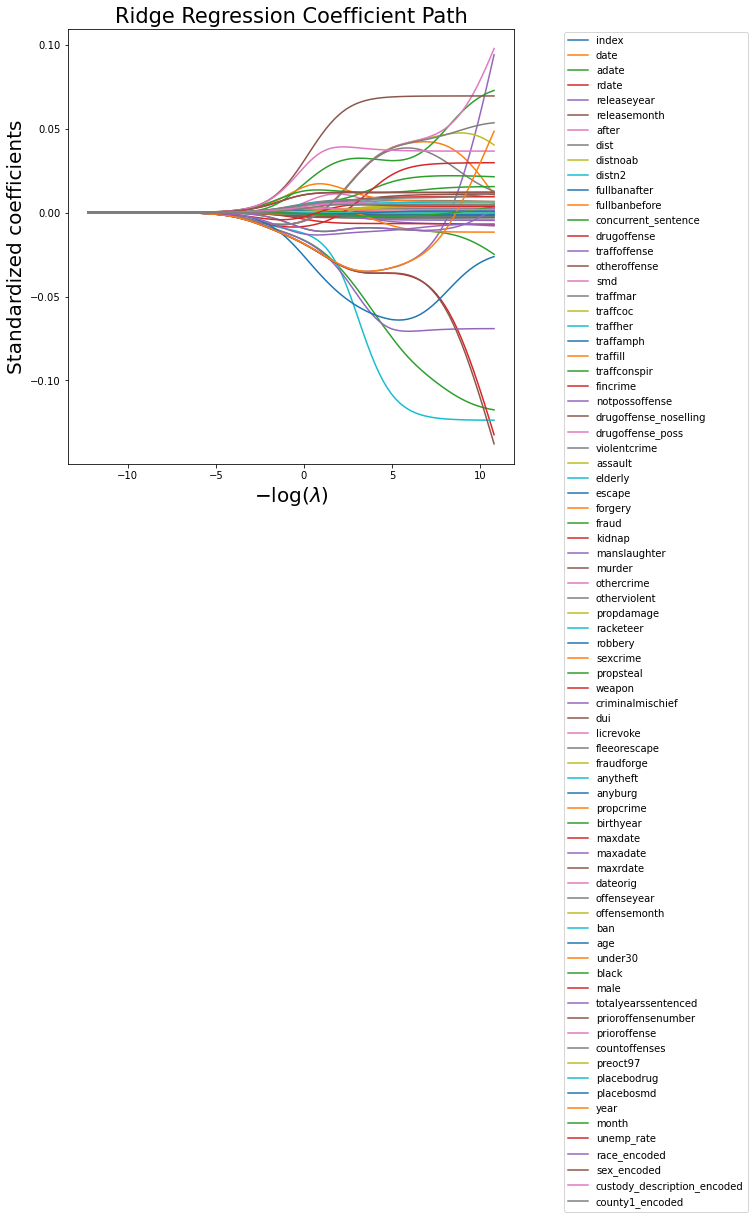

In [22]:
# Plot the graph
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.005))
ax.set_title('Ridge Regression Coefficient Path', fontsize=21); 
#ax.set_ylim([-0.1,0.4]);

In [23]:
# Ridge cross-validation plot

In [24]:
# Set up cross-validation
K = 5
kfold = KFold(n_splits = K, random_state=0, shuffle=True)

In [25]:
import warnings

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Perform RidgeCV with different alpha (lambda) values
    ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                               l1_ratio=0,
                               cv=kfold)
    pipeCV = Pipeline(steps=[('scaler', scaler),
                             ('ridge', ridgeCV)])
    print(pipeCV.fit(X, Y))

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([2.06826854e+05, 1.63906745e+05, 1.29893292e+05, 1.02938213e+05,
       8.15767731e+04, 6.46481976e+04, 5.12325910e+04, 4.06009522e+04,
       3.21755603e+04, 2.54985813e+04, 2.02071896e+04, 1.60138522e+04,
       1.26907040e+04, 1.00571659e+04, 7.97013196e+03, 6.31619328e+03,
       5.00547516e+03, 3.96675346e+03,...
       1.71711288e-03, 1.36078259e-03, 1.07839693e-03, 8.54611126e-04,
       6.77264702e-04, 5.36720694e-04, 4.25341971e-04, 3.37076238e-04,
       2.67127154e-04, 2.11693701e-04, 1.67763638e-04, 1.32949814e-04,
       1.05360454e-04, 8.34963580e-05, 6.61694358e-05, 5.24381462e-05,
       4.15563341e-05, 3.29326841e-05, 2.60985890e-05, 2.06826854e-05]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])


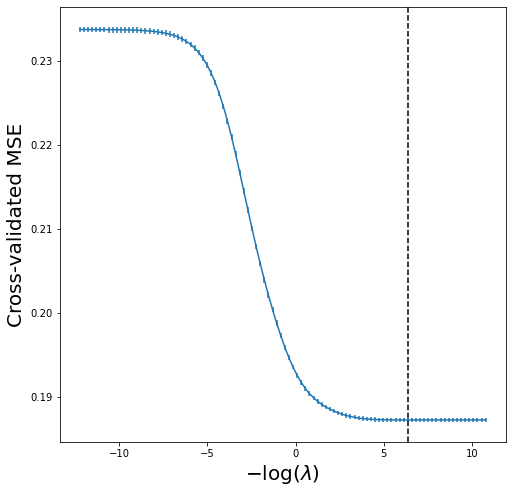

In [26]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

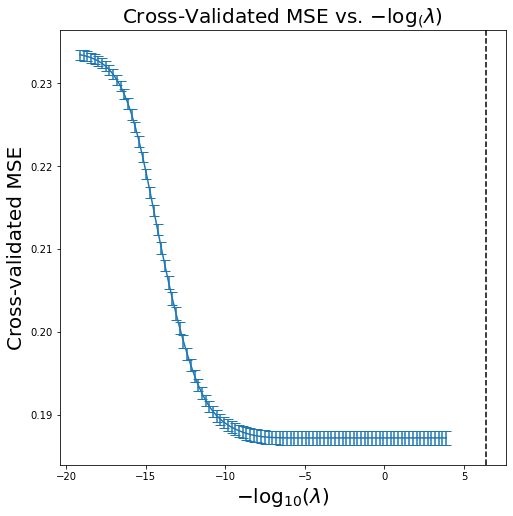

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

lambdas = 10**np.linspace(8, -2, 100) / Y.std()

# Prepare lists to hold mean and standard deviation of MSE
mean_mse = []
std_mse = []

# Cross-validated MSE for each lambda
for lambda_ in lambdas:
    ridge_model = Ridge(alpha=lambda_)
    mse_scores = cross_val_score(ridge_model, X_scaled, Y, cv=K, scoring='neg_mean_squared_error')
    mean_mse.append(-mse_scores.mean())
    std_mse.append(mse_scores.std())
    
    
optimal_index = np.argmin(mean_mse)
optimal_lambda = lambdas[optimal_index]

# Fit the Ridge model with the optimal lambda
ridge_model = Ridge(alpha=optimal_lambda)
ridge_model.fit(X_scaled, Y)

# Access the coefficients
coefficients = ridge_model.coef_

# Plotting the results

ridge_fig, ax = plt.subplots(figsize=(8, 8))
ax.errorbar(-np.log(lambdas),
            mean_mse,
            yerr=std_mse,  # Adjusting for the number of folds
             capsize=5, label='Cross-validated MSE')

# Set limits and labels
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log_{10}(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_title('Cross-Validated MSE vs. $-\log_(\lambda)$', fontsize=20)


# Show the plot
plt.show()

In [28]:
################################# LASSO #################################

In [29]:
# Lasso
import warnings

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    lassoCV = skl.ElasticNetCV(n_alphas=200, l1_ratio=1, cv=kfold)
    pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
    pipeCV.fit(X, Y)  
    tuned_lasso = pipeCV.named_steps['lasso']
    best_alpha = tuned_lasso.alpha_

In [30]:
# Compute Lasso path
#lambdas, soln_array = lasso_path(X_scaled, Y.values.ravel(), alphas=np.logspace(-4, 4, 100))[:2]

lambdas, soln_array = lasso_path(X_scaled, Y, 
                                 alphas=np.logspace(-4, 4, 100), 
                                 max_iter=10000)[:2]
soln_path = pd.DataFrame(soln_array.T, 
                         columns=X.columns, 
                         index=-np.log(lambdas))
soln_path

,index,date,adate,rdate,releaseyear,releasemonth,after,dist,distnoab,distn2,...,preoct97,placebodrug,placebosmd,year,month,unemp_rate,race_encoded,sex_encoded,custody_description_encoded,county1_encoded
-9.210340,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,0.0,0.0,-0.0,0.000000e+00,-0.000000,-0.000000,0.0,0.000000,-0.000000
-9.024273,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,0.0,0.0,-0.0,0.000000e+00,-0.000000,-0.000000,0.0,0.000000,-0.000000
-8.838205,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,0.0,0.0,-0.0,0.000000e+00,-0.000000,-0.000000,0.0,0.000000,-0.000000
-8.652138,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,0.0,0.0,-0.0,0.000000e+00,-0.000000,-0.000000,0.0,0.000000,-0.000000
-8.466070,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,0.0,0.0,-0.0,0.000000e+00,-0.000000,-0.000000,0.0,0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.466070,-0.000688,0.003197,-0.078449,-0.117976,-0.0,-0.000002,0.001526,0.007239,0.070295,-0.117637,...,0.0,0.0,-0.0,-0.0,-0.000000e+00,0.003527,-0.005434,0.0,0.001518,0.004448
8.652138,-0.000723,0.003184,-0.079671,-0.117513,-0.0,-0.000040,0.001444,0.007811,0.070507,-0.118660,...,0.0,0.0,-0.0,-0.0,-0.000000e+00,0.003564,-0.005566,0.0,0.001557,0.004470
8.838205,-0.000753,0.003172,-0.080684,-0.117130,-0.0,-0.000072,0.001377,0.008337,0.070631,-0.119509,...,0.0,0.0,-0.0,-0.0,-0.000000e+00,0.003595,-0.005686,0.0,0.001590,0.004489
9.024273,-0.000776,0.003203,-0.081506,-0.116841,-0.0,-0.000099,0.001323,0.008835,0.070680,-0.120213,...,0.0,0.0,-0.0,-0.0,-1.695007e-07,0.003619,-0.005832,0.0,0.001616,0.004506


           index  date  adate  rdate  releaseyear  releasemonth  after  dist  \
-9.210340   -0.0  -0.0   -0.0   -0.0         -0.0           0.0   -0.0  -0.0   
-9.024273   -0.0  -0.0   -0.0   -0.0         -0.0           0.0   -0.0  -0.0   
-8.838205   -0.0  -0.0   -0.0   -0.0         -0.0           0.0   -0.0  -0.0   
-8.652138   -0.0  -0.0   -0.0   -0.0         -0.0           0.0   -0.0  -0.0   
-8.466070   -0.0  -0.0   -0.0   -0.0         -0.0           0.0   -0.0  -0.0   

           distnoab  distn2  ...  preoct97  placebodrug  placebosmd  year  \
-9.210340      -0.0    -0.0  ...       0.0          0.0         0.0  -0.0   
-9.024273      -0.0    -0.0  ...       0.0          0.0         0.0  -0.0   
-8.838205      -0.0    -0.0  ...       0.0          0.0         0.0  -0.0   
-8.652138      -0.0    -0.0  ...       0.0          0.0         0.0  -0.0   
-8.466070      -0.0    -0.0  ...       0.0          0.0         0.0  -0.0   

           month  unemp_rate  race_encoded  sex_encoded 

/var/folders/1x/fvyxnz7d5db2mw8jz8k69snr0000gn/T/ipykernel_70860/3864432806.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


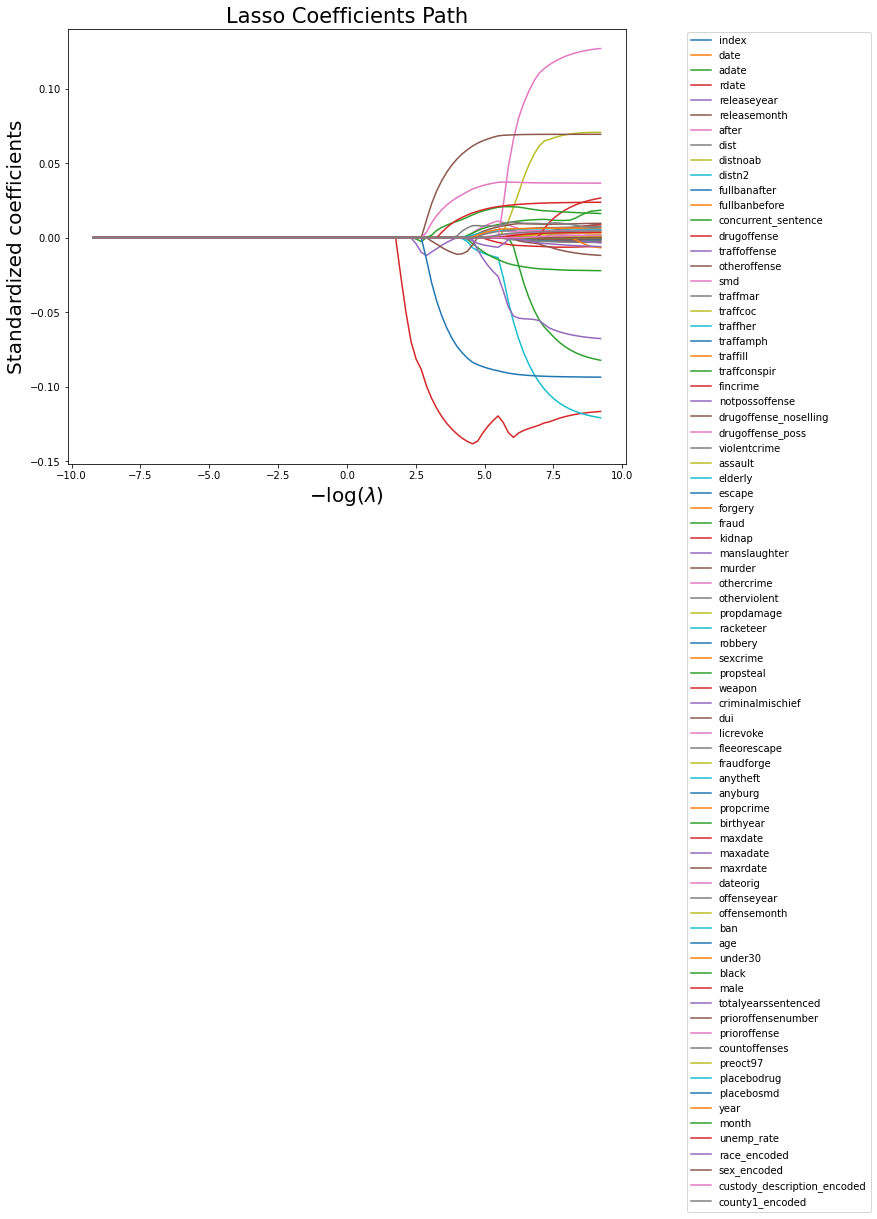

In [34]:
import matplotlib.pyplot as plt

# Check the structure of soln_path before plotting
print(soln_path.head())
print(soln_path.index)
print(soln_path.columns)

# Plot the solution path
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plot each variable with a unique color and label
for column in soln_path.columns:
    ax.plot(soln_path.index.to_numpy(), soln_path[column].to_numpy(), label=column)  # Use .to_numpy()

ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.set_title('Lasso Coefficients Path', fontsize=21)
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.005))
plt.tight_layout()  
plt.show()

# print(f'Best alpha: {best_alpha}')  # Uncomment to display best alpha

In [35]:
# Cross-validation MSE

In [36]:
import warnings

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    lassoCV = skl.ElasticNetCV(n_alphas=100,
                               l1_ratio=1,
                               cv=kfold)
    pipeCV = Pipeline(steps=[('scaler', scaler),
                             ('lasso', lassoCV)])
    pipeCV.fit(X, Y)
    tuned_lasso = pipeCV.named_steps['lasso']
    tuned_lasso.alpha_

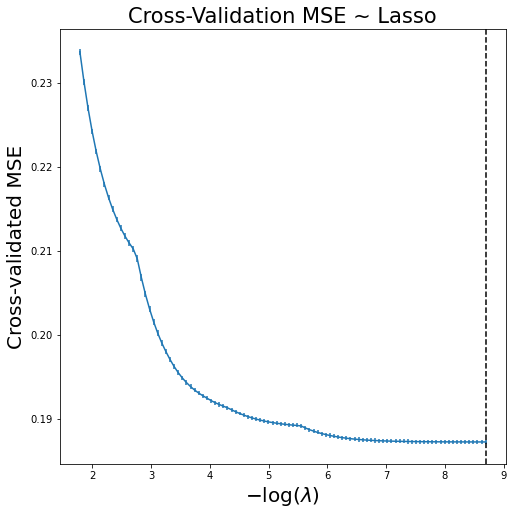

In [37]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_title('Cross-Validation MSE ~ Lasso', fontsize =21);

In [38]:
########################### CLASSIFICATION TREE #############################

In [39]:
# Load packages
import sklearn.model_selection as skm
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR,
      GradientBoostingClassifier as GBC,
     RandomForestClassifier as RFC)

In [40]:
# classification Tree
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)
clf.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [41]:
# Accuracy
print('Accuracy score:',accuracy_score(Y, clf.predict(X)))

# Residual value
resid_dev = np.sum(log_loss(Y, clf.predict_proba(X)))
print('Residual value:',resid_dev)

Accuracy score: 0.6744177069581799
Residual value: 0.5810712818689788


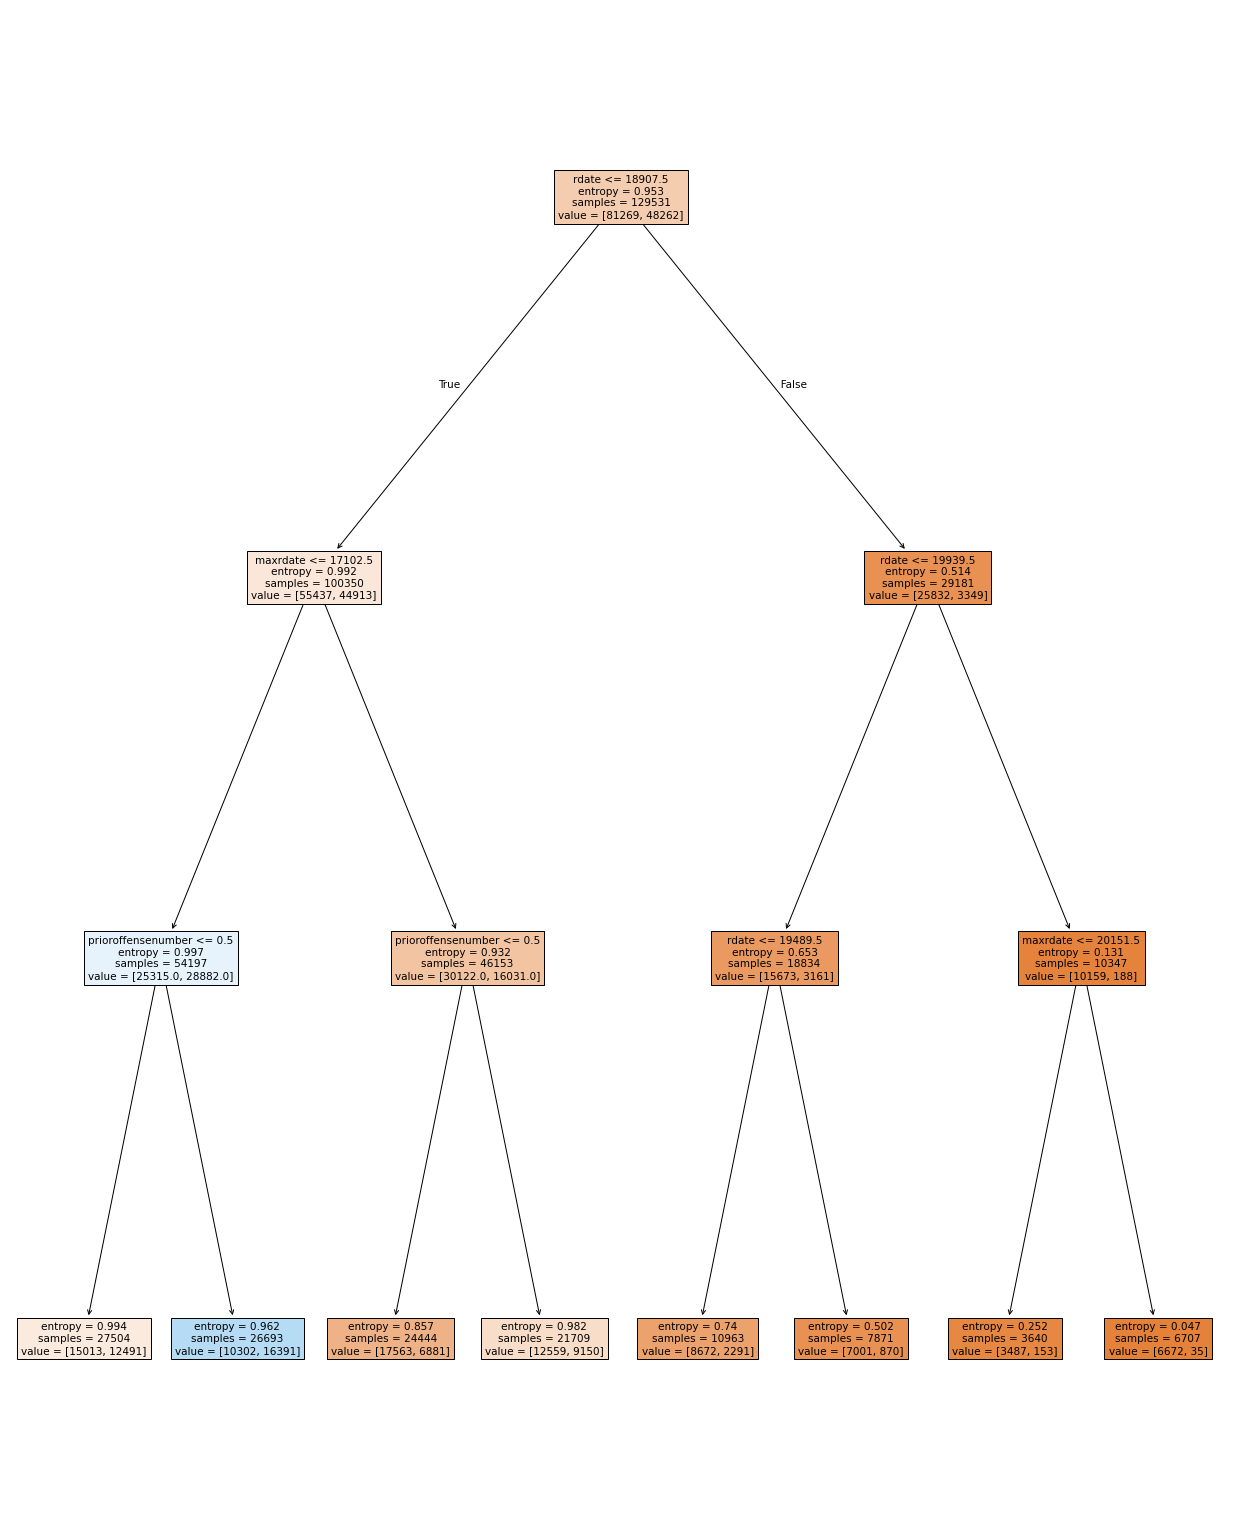

In [42]:
# Plot the tree
feature_names = X.columns
ax = subplots(figsize=(22,28))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax, filled = True);

In [43]:
# Convert feature_names (pandas Index) to a list
feature_names = feature_names.tolist()

# Print the decision tree rules
tree_rules = export_text(clf, feature_names=feature_names, show_weights=True)
print(tree_rules)

|--- rdate <= 18907.50
|   |--- maxrdate <= 17102.50
|   |   |--- prioroffensenumber <= 0.50
|   |   |   |--- weights: [15013.00, 12491.00] class: 0.0
|   |   |--- prioroffensenumber >  0.50
|   |   |   |--- weights: [10302.00, 16391.00] class: 1.0
|   |--- maxrdate >  17102.50
|   |   |--- prioroffensenumber <= 0.50
|   |   |   |--- weights: [17563.00, 6881.00] class: 0.0
|   |   |--- prioroffensenumber >  0.50
|   |   |   |--- weights: [12559.00, 9150.00] class: 0.0
|--- rdate >  18907.50
|   |--- rdate <= 19939.50
|   |   |--- rdate <= 19489.50
|   |   |   |--- weights: [8672.00, 2291.00] class: 0.0
|   |   |--- rdate >  19489.50
|   |   |   |--- weights: [7001.00, 870.00] class: 0.0
|   |--- rdate >  19939.50
|   |   |--- maxrdate <= 20151.50
|   |   |   |--- weights: [3487.00, 153.00] class: 0.0
|   |   |--- maxrdate >  20151.50
|   |   |   |--- weights: [6672.00, 35.00] class: 0.0



In [44]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=200,
                              random_state=0)
results = skm.cross_validate(clf,
                             data,
                             Y,
                             cv=validation)
results['test_score']

array([1.])

In [45]:
# Pruning Classification Tree

In [46]:
# Load the packages
import sklearn.model_selection as skm
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR,
     RandomForestClassifier as RFC)

In [47]:
# Split the data between train and text
(X_train,
 X_test,
 Y_train,
 Y_test) = skm.train_test_split(X,
                               Y,
                                test_size=0.3,
                                random_state=0)

In [48]:
clf1 = DTC(criterion='entropy', random_state=0)
clf1.fit(X_train, Y_train)
accuracy_score(Y_test, clf.predict(X_test))

0.674704065877509

In [49]:
ccp_path = clf.cost_complexity_pruning_path(X_train, Y_train)
kfold1 = skm.KFold(10,
                  random_state=1,
                  shuffle=True)

In [50]:
grid = skm.GridSearchCV(clf1,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold1,
                        scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_score_

0.6982829875656346

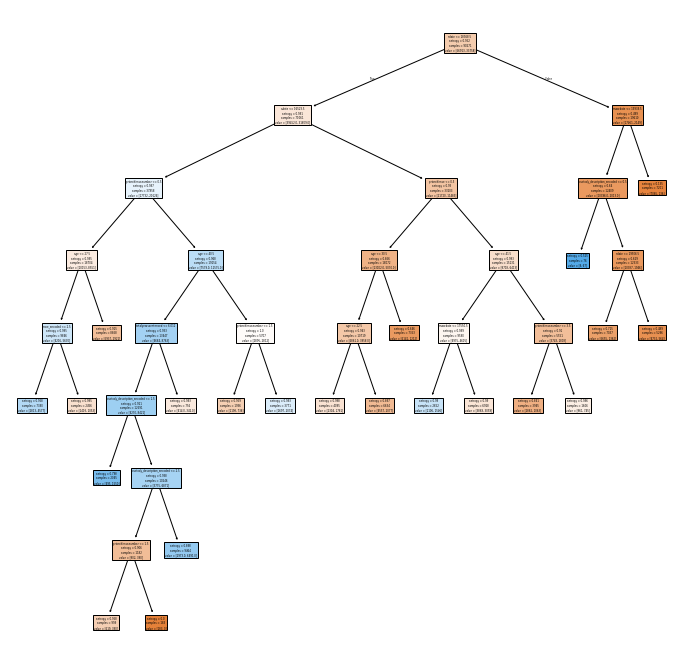

In [51]:
# Plot the pruned tree
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=feature_names,
          ax=ax, filled=True);

In [52]:
########################### BAGGING & RANDOM FOREST ########################

In [53]:
# Building the forest
data_RF = RFC(max_features = X_train.shape[1], random_state=0)
data_RF.fit(X_train,Y_train)

RandomForestClassifier(max_features=78, random_state=0)

In [54]:
# Make predictions
Y_pred = data_RF.predict(X_test)

0.27781780751415336

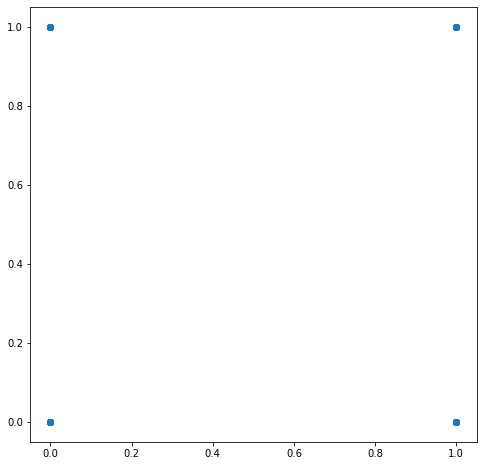

In [55]:
# Plot the random forest
ax = subplots(figsize=(8,8))[1]
Y_hat = data_RF.predict(X_test)
ax.scatter(Y_hat, Y_test)
np.mean((Y_test - Y_hat)**2)

0.7073597529593412
[[19898  4458]
 [ 6338  8166]]


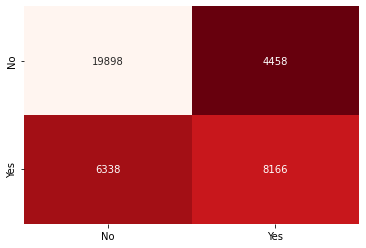

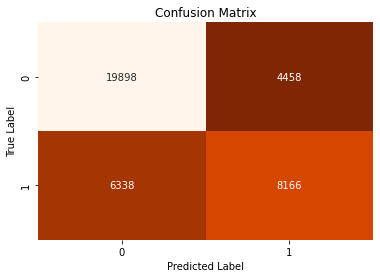

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(accuracy_score(Y_test,
                     best_.predict(X_test)))
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Print the confusion matrix
print(cm)
#cm = pd.DataFrame(cm)
#d = {'col':
#pd.DataFrame(cm, index=['No','Yes'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds_r", cbar=False,
            xticklabels=["No", "Yes"],  # Custom labels for X-axis (predicted labels)
            yticklabels=["No", "Yes"])  

# Optionally, visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges_r", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

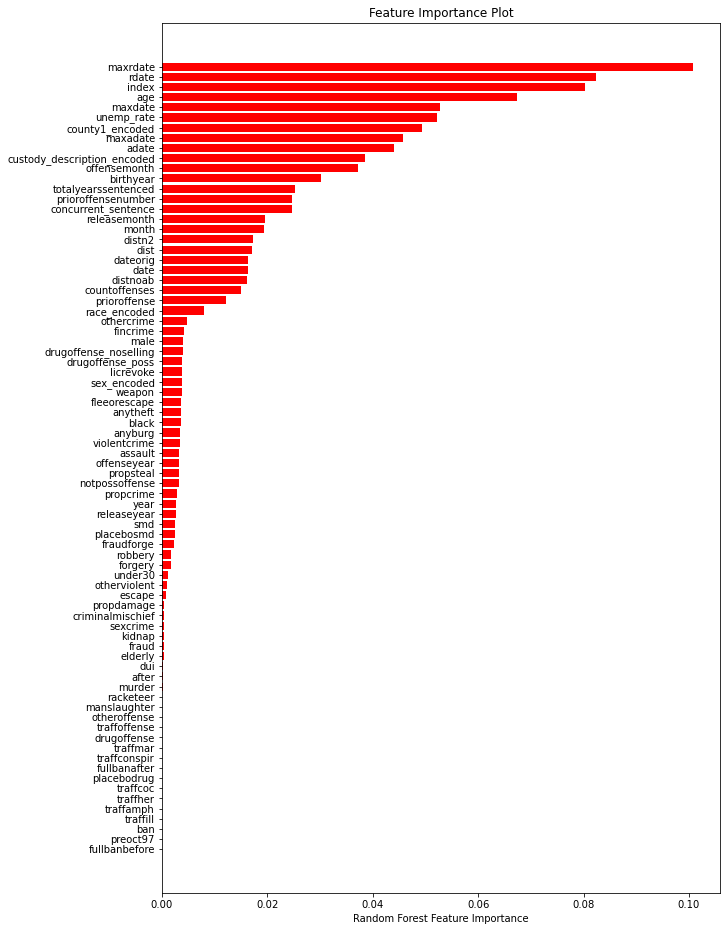

In [59]:
# Plot variable importance
importance = data_RF.feature_importances_
sorted_importance = importance.argsort()

plt.figure(figsize=(10, 16))
plt.barh(X.columns[sorted_importance], importance[sorted_importance],color = 'red')
plt.xlabel('Random Forest Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

In [58]:
# Table importance
feature_imp = pd.DataFrame(
    {'importance':data_RF.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
maxrdate,0.100828
rdate,0.082360
index,0.080240
age,0.067277
maxdate,0.052727
...,...
traffoffense,0.000000
drugoffense,0.000000
fullbanbefore,0.000000
fullbanafter,0.000000


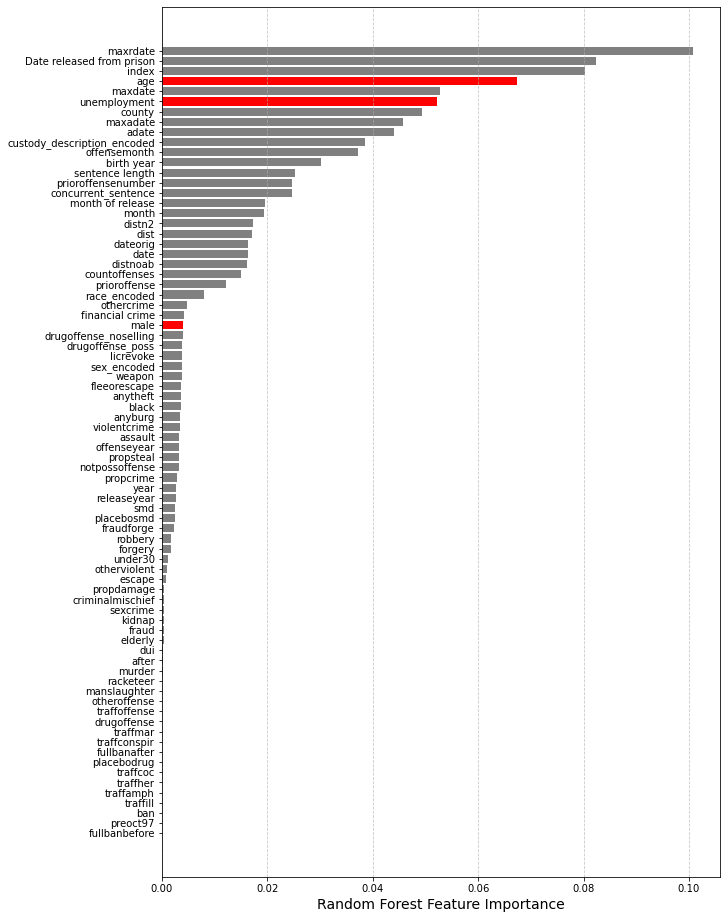

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_RF is your fitted Random Forest model and X is your feature DataFrame
importance2 = data_RF.feature_importances_
sorted_importance2 = np.argsort(importance2)

# Create a DataFrame for better handling
feature_importance_df2 = pd.DataFrame({
    'Feature': X.columns[sorted_importance2],
    'Importance': importance[sorted_importance2]
})
# Dictionary for renaming multiple variables
rename_dict = {
    'unemp_rate': 'unemployment',
    'totalyearssentenced': 'sentence length',  
    'fincrime': 'financial crime',
    'priooffensenumber':'number of prior offenses',
    'birthyear': 'birth year',
    'county1_encoded':'county',
    'releasemonth': 'month of release',
    'rdate':'Date released from prison'
}
# Change 'unemp_rate' to 'employment'
feature_importance_df2['Feature'] = feature_importance_df2['Feature'].replace(rename_dict)

# Highlighted features
highlighted_features = ['age', 'unemployment','male']

# Create a color array: Use a bright color for highlighted features and grey for others
colors = ['red' if feature in highlighted_features else 'grey' for feature in feature_importance_df2['Feature']]

plt.figure(figsize=(10, 16))
plt.barh(feature_importance_df2['Feature'], feature_importance_df2['Importance'], color=colors)
plt.xlabel('Random Forest Feature Importance', fontsize=14)
#plt.title('Feature Importance Plot', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show();

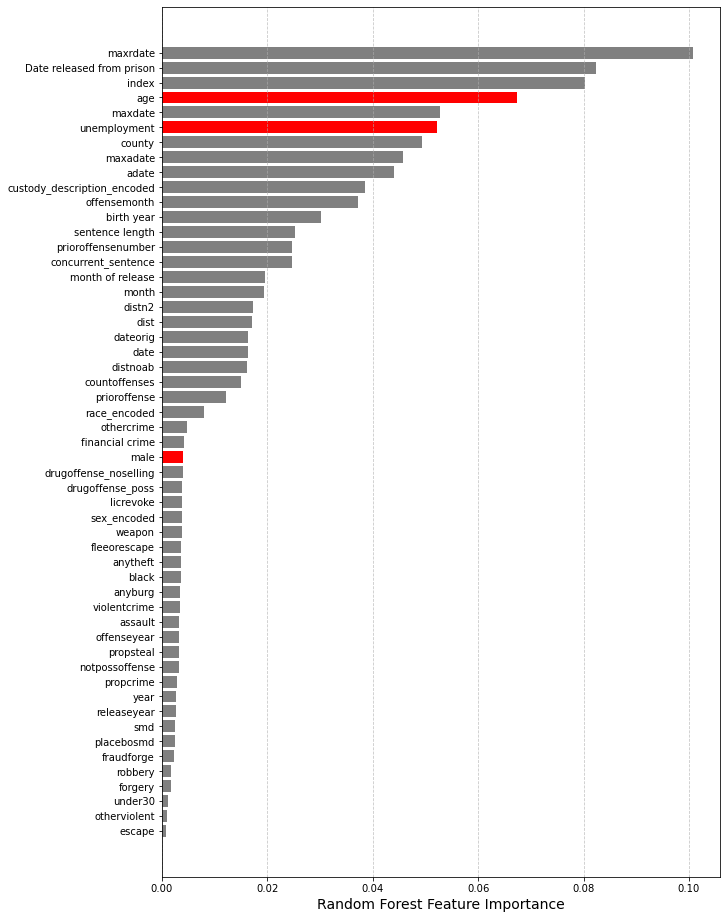

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

importance2 = data_RF.feature_importances_
sorted_importance2 = np.argsort(importance2)

# Create a DataFrame for better handling
feature_importance_df2 = pd.DataFrame({
    'Feature': X.columns[sorted_importance2],
    'Importance': importance2[sorted_importance2]  
})

# Dictionary for renaming multiple variables
rename_dict = {
    'unemp_rate': 'unemployment',
    'totalyearssentenced': 'sentence length',  
    'fincrime': 'financial crime',
    'priooffensenumber':'number of prior offenses',
    'birthyear': 'birth year',
    'county1_encoded':'county',
    'releasemonth': 'month of release',
    'rdate':'Date released from prison'
}

# Replace feature names using the dictionary
feature_importance_df2['Feature'] = feature_importance_df2['Feature'].replace(rename_dict)

# Remove features with importance of 0
feature_importance_df2 = feature_importance_df2[feature_importance_df2['Importance'] > 0.0005]

# Highlighted features
highlighted_features = ['age', 'unemployment', 'male']

# Create a color array: Use a bright color for highlighted features and grey for others
colors = ['red' if feature in highlighted_features else 'grey' for feature in feature_importance_df2['Feature']]

plt.figure(figsize=(10, 16))
plt.barh(feature_importance_df2['Feature'], feature_importance_df2['Importance'], color=colors)
plt.xlabel('Random Forest Feature Importance', fontsize=14)
# plt.title('Feature Importance Plot', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Save figure
plt.savefig("importance.png",format ='png', dpi=300, bbox_inches='tight')

# Show plot
plt.show();

In [52]:
############################### BOOSTING ###############################

In [53]:
# Boosted regression tress
boost = GBC(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=0)
boost.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=5000,
                           random_state=0)

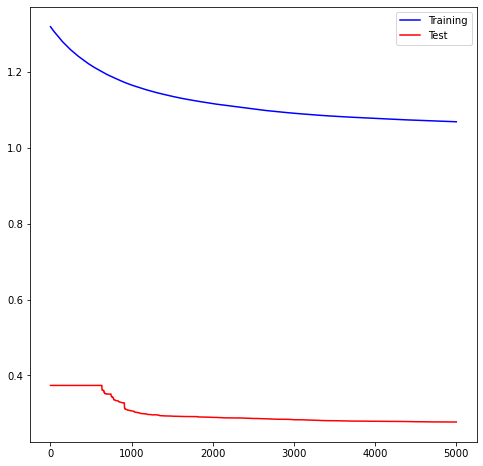

In [54]:
# Plot the error
test_error = np.zeros_like(boost.train_score_)
for idx, y_ in enumerate(boost.staged_predict(X_test)):
   test_error[idx] = np.mean((Y_test - y_)**2)

plot_idx = np.arange(boost.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();

In [67]:
######################################## PAPER REGRESSIONS ###################################################

In [14]:
# PAPER REGRESSION
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from pandas import concat
from matplotlib.pyplot import subplots
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, lasso_path, RidgeCV
from sklearn.preprocessing import StandardScaler

In [16]:
# Import dataset again
dataset = pd.read_stata('updated_fl.dta')

In [17]:
# Set variables
x = dataset.drop(columns = ['anyrecid'])
y = dataset['anyrecid']

In [23]:
# Regression paper
reg = smf.ols('y ~ ban * unemp_rate', data = dataset).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4266.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:20:28   Log-Likelihood:            -2.5282e+05
No. Observations:              403398   AIC:                         5.057e+05
Df Residuals:                  403394   BIC:                         5.057e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4636      0.002    270.

In [19]:
# Regression in the paper
regression = smf.ols('y ~ after + rdate', data = dataset).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                 2.544e+04
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:14:06   Log-Likelihood:            -2.4397e+05
No. Observations:              416488   AIC:                         4.879e+05
Df Residuals:                  416485   BIC:                         4.880e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8010      0.007    257.779      0.0

In [29]:
groups = dataset.groupby(['race', 'sex'])

for (race, sex), group_data in groups:
    print(f"\nOLS for Race: {race}, Sex: {sex}")
    
    # Drop rows with missing values for the variables used in the model
    group_data = group_data.dropna(subset=['anyrecid', 'ban', 'unemp_rate'])
    
    # If group_data is empty after dropping NaNs, skip to the next group
    if group_data.empty:
        print(f"Skipping OLS for Race: {race}, Sex: {sex} due to no valid data.")
        continue
    
    # Fit the OLS model
    reg = smf.ols('anyrecid ~ ban * unemp_rate', data=group_data).fit()
    print(reg.summary())


OLS for Race: A, Sex: F
                            OLS Regression Results                            
Dep. Variable:               anyrecid   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    0.5732
Date:                Sun, 20 Oct 2024   Prob (F-statistic):              0.597
Time:                        01:37:48   Log-Likelihood:                -1.6739
No. Observations:                   8   AIC:                             9.348
Df Residuals:                       5   BIC:                             9.586
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -

/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:               anyrecid   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2462.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:37:48   Log-Likelihood:            -1.2215e+05
No. Observations:              180660   AIC:                         2.443e+05
Df Residuals:                  180656   BIC:                         2.443e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5748      0.003    215.

                            OLS Regression Results                            
Dep. Variable:               anyrecid   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1146.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:37:48   Log-Likelihood:            -1.0088e+05
No. Observations:              174508   AIC:                         2.018e+05
Df Residuals:                  174504   BIC:                         2.018e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3679      0.003    146.

In [46]:
# Regression in the paper with control for characteristics (sex, race)
regression = smf.ols('y ~ after + rdate + C(race) + C(sex)', data = dataset).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     8544.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:49:18   Log-Likelihood:            -2.4002e+05
No. Observations:              416488   AIC:                         4.801e+05
Df Residuals:                  416480   BIC:                         4.802e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4297      0.064     22.377   

In [47]:
# Regression in the paper with control for characteristics (sex, race) and number of years of sentence
regression = smf.ols('y ~ after + rdate + C(race) + C(sex) + totalyearssentenced', data = dataset).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     7534.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:49:23   Log-Likelihood:            -2.3982e+05
No. Observations:              416488   AIC:                         4.797e+05
Df Residuals:                  416479   BIC:                         4.798e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4277    

In [66]:
############################### Direct Acyclic Graph (DAG) ######################################

In [12]:
import pandas as pd
import numpy as np

# Get a list of column names
columns = dataset.columns.tolist()

# Categorize columns
event_columns = [col for col in columns if 'date' in col or 'year' in col or 'month' in col]
offense_columns = [col for col in columns if 'offense' in col]
demographic_columns = ['race', 'sex', 'birthyear', 'age', 'under30']
recidivism_columns = [col for col in columns if 'recid' in col]
sentence_columns = ['totalyearssentenced', 'concurrent_sentence']
prior_offense_columns = ['prioroffensenumber', 'prioroffense']

print("Event-related columns:")
print(event_columns)
print("\
Offense-related columns:")
print(offense_columns)
print("\
Demographic columns:")
print(demographic_columns)
print("\
Recidivism-related columns:")
print(recidivism_columns)
print("\
Sentence-related columns:")
print(sentence_columns)
print("\
Prior offense columns:")
print(prior_offense_columns)

# Check unique values for categorical columns
categorical_columns = ['race', 'sex', 'custody_description', 'facility_description']
for col in categorical_columns:
    print(f"\
Unique values in {col}:")
    print(dataset[col].unique())

NameError: name 'dataset' is not defined

DAG plot saved as 'offender_dag.png'


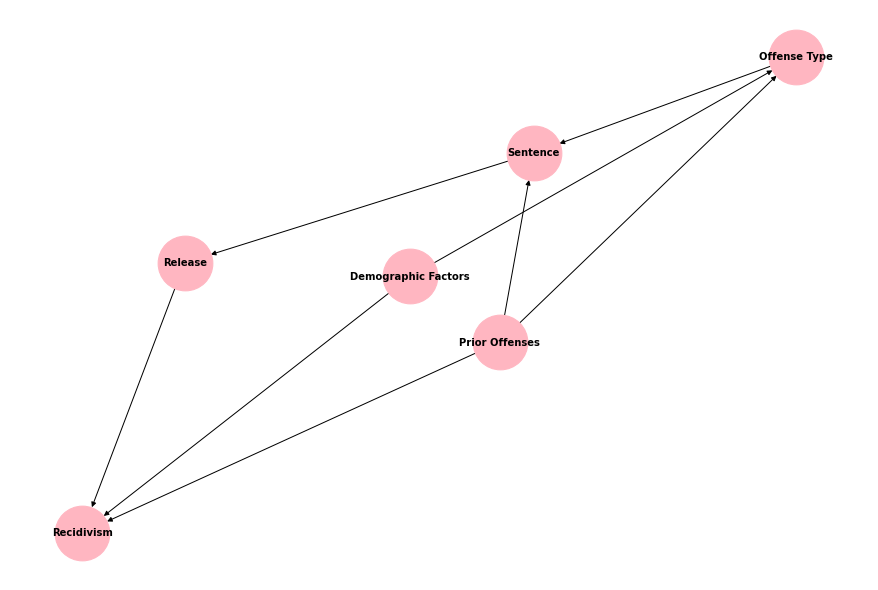

<Figure size 1008x1152 with 0 Axes>

In [177]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Demographic Factors")
G.add_node("Prior Offenses")
G.add_node("Offense Type")
G.add_node("Sentence")
G.add_node("Release")
G.add_node("Recidivism")

# Add edges (relationships between nodes)
G.add_edge("Demographic Factors", "Offense Type")
G.add_edge("Demographic Factors", "Recidivism")
G.add_edge("Prior Offenses", "Offense Type")
G.add_edge("Prior Offenses", "Sentence")
G.add_edge("Prior Offenses", "Recidivism")
G.add_edge("Offense Type", "Sentence")
G.add_edge("Sentence", "Release")
G.add_edge("Release", "Recidivism")

# Set up the plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightpink', 
        node_size=3000, font_size=10, font_weight='bold', 
        arrows=True, edge_color='black')

# Add edge labels
#edge_labels = {
 #   ("Demographic Factors", "Offense Type"): "Influences",
  #  ("Demographic Factors", "Recidivism"): "Affects",
   # ("Prior Offenses", "Offense Type"): "Predicts",
    #("Prior Offenses", "Sentence"): "Influences",
    #("Prior Offenses", "Recidivism"): "Predicts",
    #("Offense Type", "Sentence"): "Determines",
    #("Sentence", "Release"): "Leads to",
    #("Release", "Recidivism"): "May result in"
#}
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Save the plot as an image file
plt.savefig('offender_dag.png', format='png', dpi=300, bbox_inches='tight')
print("DAG plot saved as 'offender_dag.png'")

# Display the plot
plt.figure(figsize=(14,16))
plt.show();

DAG plot saved as 'offender_dag_control.png'


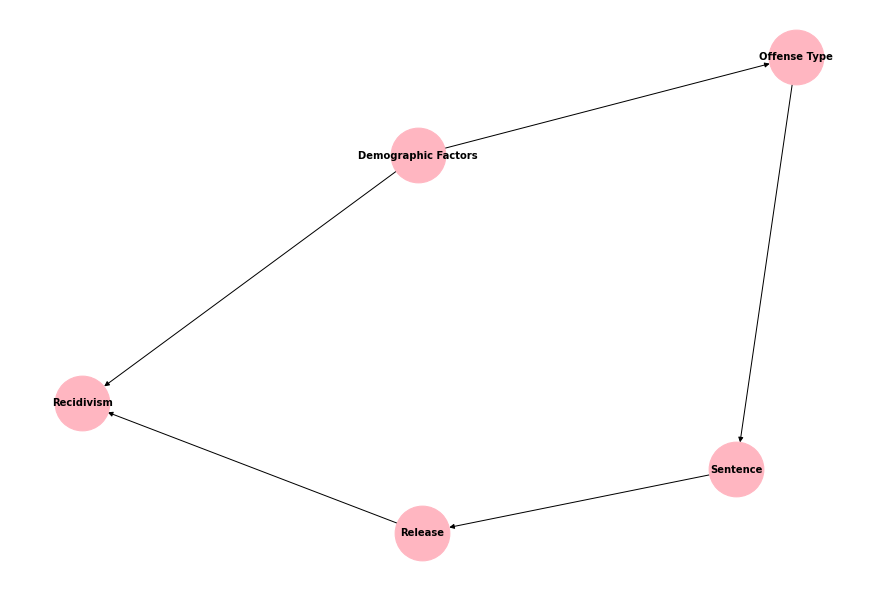

<Figure size 1008x1152 with 0 Axes>

In [79]:
# DAG while controlling/intervening for 'prior offense'

# Create a new directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Demographic Factors")
G.add_node("Offense Type")
G.add_node("Sentence")
G.add_node("Release")
G.add_node("Recidivism")

# Add edges (relationships between nodes)
G.add_edge("Demographic Factors", "Offense Type")
G.add_edge("Demographic Factors", "Recidivism")
G.add_edge("Offense Type", "Sentence")
G.add_edge("Sentence", "Release")
G.add_edge("Release", "Recidivism")

# Set up the plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightpink', 
        node_size=3000, font_size=10, font_weight='bold', 
        arrows=True, edge_color='black')

# Add edge labels
#edge_labels = {
 #   ("Demographic Factors", "Offense Type"): "Influences",
  #  ("Demographic Factors", "Recidivism"): "Affects",
   # ("Prior Offenses", "Offense Type"): "Predicts",
    #("Prior Offenses", "Sentence"): "Influences",
    #("Prior Offenses", "Recidivism"): "Predicts",
    #("Offense Type", "Sentence"): "Determines",
    #("Sentence", "Release"): "Leads to",
    #("Release", "Recidivism"): "May result in"
#}
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Save the plot as an image file
plt.savefig('offender_dag_control.png', format='png', dpi=300, bbox_inches='tight')
print("DAG plot saved as 'offender_dag_control.png'")

# Display the plot
plt.figure(figsize=(14,16))
plt.show();

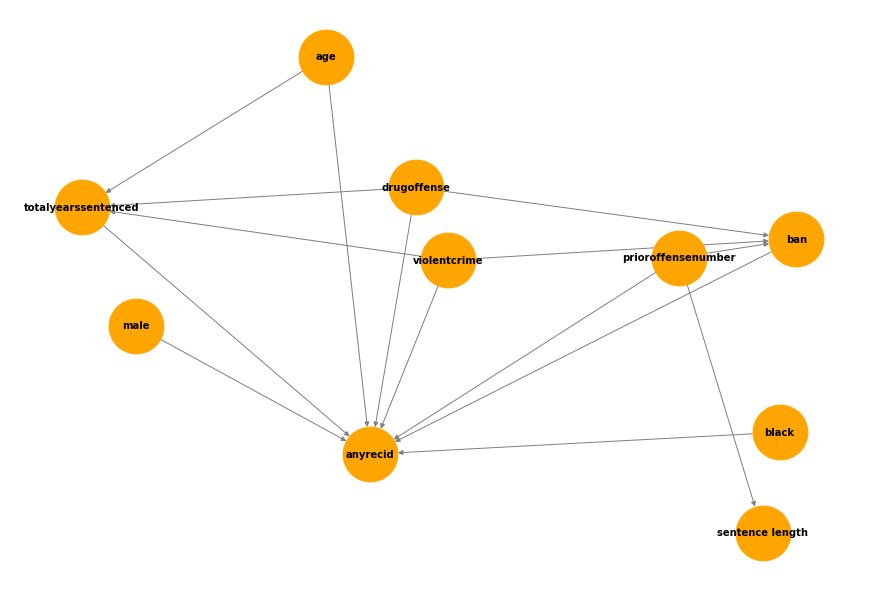

DAG has been created and saved as 'recidivism_dag.png'.


In [185]:
# DAG with some variables
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = ['age', 'black', 'male', 'totalyearssentenced', 'prioroffensenumber', 
         'drugoffense', 'violentcrime', 'ban', 'anyrecid']
G.add_nodes_from(nodes)

# Add edges
edges = [
    ('age', 'anyrecid'),
    ('black', 'anyrecid'),
    ('male', 'anyrecid'),
    ('totalyearssentenced', 'anyrecid'),
    ('prioroffensenumber', 'anyrecid'),
    ('drugoffense', 'anyrecid'),
    ('violentcrime', 'anyrecid'),
    ('ban', 'anyrecid'),
    ('age', 'totalyearssentenced'),
    ('prioroffensenumber', 'sentence length'),
    ('drugoffense', 'totalyearssentenced'),
    ('violentcrime', 'totalyearssentenced'),
    ('prioroffensenumber', 'ban'),
    ('drugoffense', 'ban'),
    ('violentcrime', 'ban')
]
G.add_edges_from(edges)

# Set up the plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='orange', 
        node_size=3000, font_size=10, font_weight='bold', 
        arrows=True, edge_color='gray')

# Save the plot
plt.savefig('recidivism_dag.png', dpi=300, bbox_inches='tight')
plt.show()

print("DAG has been created and saved as 'recidivism_dag.png'.")

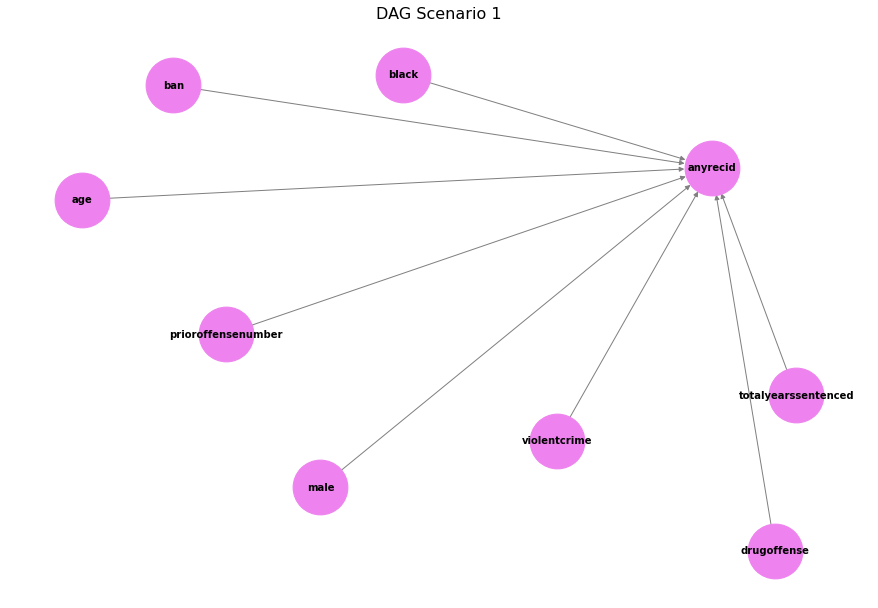

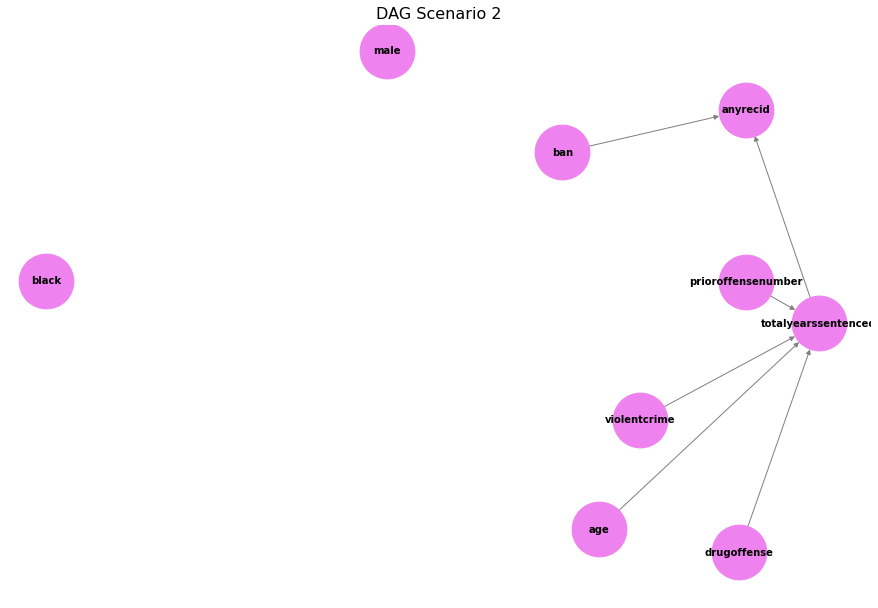

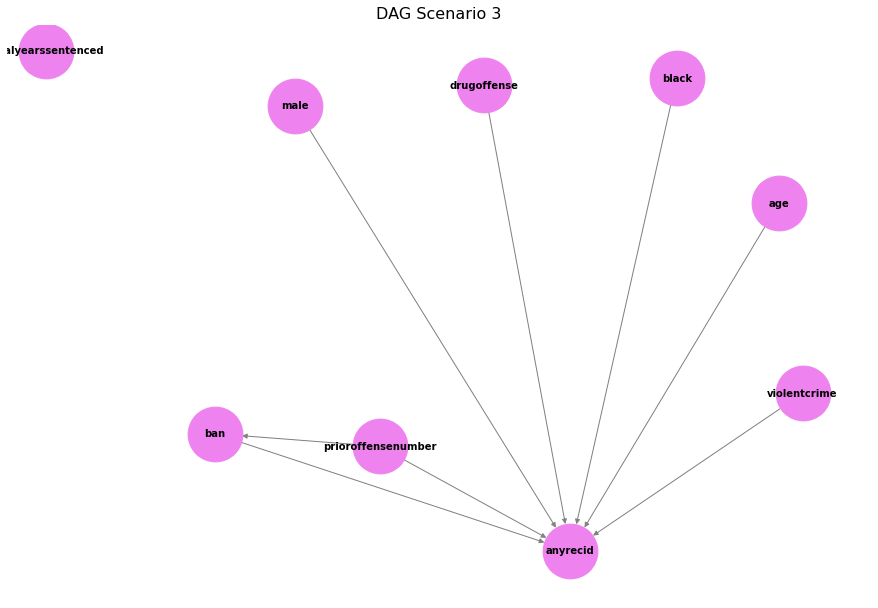

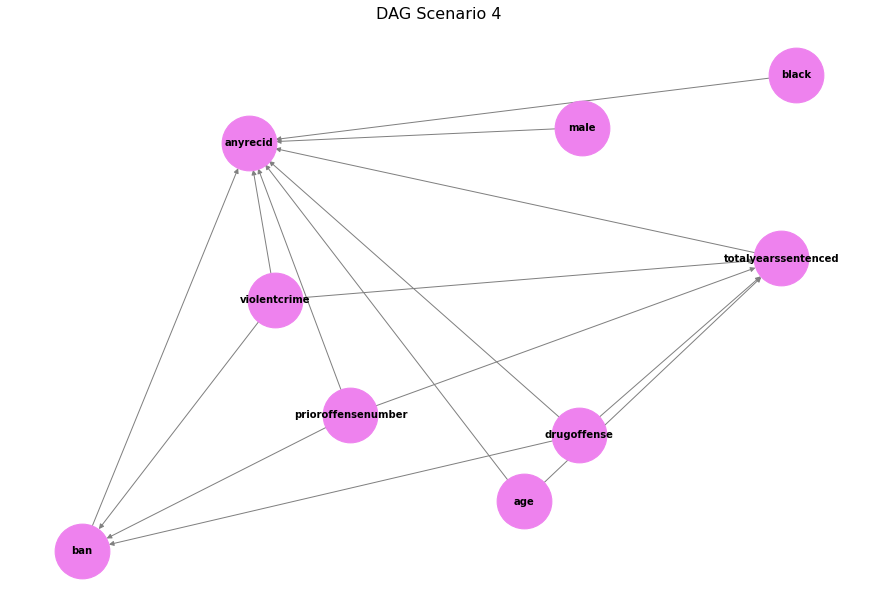

DAGs for all scenarios have been created and saved.


In [53]:
# Define different scenarios for DAGs
scenarios = [
    # Scenario 1: Direct effects only
    [('age', 'anyrecid'), ('black', 'anyrecid'), ('male', 'anyrecid'),
     ('totalyearssentenced', 'anyrecid'), ('prioroffensenumber', 'anyrecid'),
     ('drugoffense', 'anyrecid'), ('violentcrime', 'anyrecid'), ('ban', 'anyrecid')],
    
    # Scenario 2: Including mediators (totalyearssentenced as a mediator)
    [('age', 'totalyearssentenced'), ('prioroffensenumber', 'totalyearssentenced'),
     ('drugoffense', 'totalyearssentenced'), ('violentcrime', 'totalyearssentenced'),
     ('totalyearssentenced', 'anyrecid'), ('ban', 'anyrecid')],
    
    # Scenario 3: Including confounders (prioroffensenumber affecting both ban and anyrecid)
    [('prioroffensenumber', 'ban'), ('prioroffensenumber', 'anyrecid'),
     ('ban', 'anyrecid'), ('age', 'anyrecid'), ('black', 'anyrecid'),
     ('male', 'anyrecid'), ('drugoffense', 'anyrecid'), ('violentcrime', 'anyrecid')],
    
    # Scenario 4: Full model with all paths
    [('age', 'anyrecid'), ('black', 'anyrecid'), ('male', 'anyrecid'),
     ('totalyearssentenced', 'anyrecid'), ('prioroffensenumber', 'anyrecid'),
     ('drugoffense', 'anyrecid'), ('violentcrime', 'anyrecid'), ('ban', 'anyrecid'),
     ('age', 'totalyearssentenced'), ('prioroffensenumber', 'totalyearssentenced'),
     ('drugoffense', 'totalyearssentenced'), ('violentcrime', 'totalyearssentenced'),
     ('prioroffensenumber', 'ban'), ('drugoffense', 'ban'), ('violentcrime', 'ban')]
]

# Create and save DAGs for each scenario
for i, edges in enumerate(scenarios, 1):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.9, iterations=50)
    nx.draw(G, pos, with_labels=True, node_color='violet', 
            node_size=3000, font_size=10, font_weight='bold', 
            arrows=True, edge_color='gray')
    plt.title(f"DAG Scenario {i}", fontsize=16)
    plt.savefig(f'recidivism_dag_scenario_{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

print("DAGs for all scenarios have been created and saved.")

In [117]:
########################################## Direct Acyclic Graph (DAG) - Part II ####################################

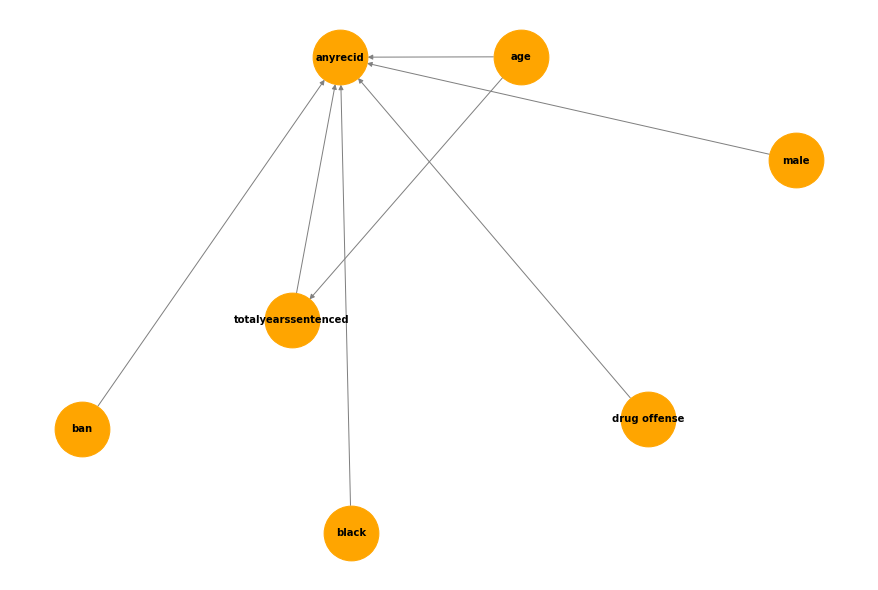

DAG has been created and saved as 'recidivism_dag.png'.


In [154]:
# DAG with some variables
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = ['age', 'black', 'male', 'totalyearssentenced','ban', 'anyrecid']
G.add_nodes_from(nodes)

# Add edges
edges = [
    ('age', 'anyrecid'),
    ('black', 'anyrecid'),
    ('male', 'anyrecid'),
    ('totalyearssentenced', 'anyrecid'),
    ('drug offense', 'anyrecid'),
    ('ban', 'anyrecid'),
    ('age', 'totalyearssentenced'),

]
G.add_edges_from(edges)

# Set up the plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='orange', 
        node_size=3000, font_size=10, font_weight='bold', 
        arrows=True, edge_color='gray')

# Save the plot
plt.savefig('recidivism_dag.png', dpi=300, bbox_inches='tight')
plt.show()

print("DAG has been created and saved as 'recidivism_dag.png'.")

In [119]:
!pip install dowhy
import pandas as pd
import numpy as np

In [178]:
# Load packages
from dowhy import CausalModel
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from pandas import concat
from matplotlib.pyplot import subplots
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, lasso_path, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [186]:
# Import data
data = pd.read_stata("fl_offenders.dta")

# Convert Categorical variables: List of categorical columns
categorical_cols = ['race','sex','custody_description','county1']

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    data[col+ '_encoded'] = le.fit_transform(data[col])
    
# Select columns
data = data.select_dtypes(include=['number'])

In [187]:
# Remove missing observations
data = data.dropna()
data.shape

/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-p

In [188]:
# Define variables
X = data.drop(columns = ["anyrecid","distn3","distn4","finrecidany","nonfinrecidany"])
Y = data["anyrecid"]

In [199]:
# Setting causal model
model = CausalModel(data=data,
                    treatment='prioroffensenumber',
                    outcome='anyrecid',
                    graph=G)

In [200]:
# Identify the estimand
estimand = model.identify_effect()

In [201]:
# Display the identified estimand
print(estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                       
─────────────────────(E[anyrecid])
d[prioroffensenumber]             
Estimand assumption 1, Unconfoundedness: If U→{prioroffensenumber} and U→anyrecid then P(anyrecid|prioroffensenumber,,U) = P(anyrecid|prioroffensenumber,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [202]:
# Obtain estimates 
estimate = model.estimate_effect(identified_estimand=estimand,
                                 method_name='backdoor.linear_regression')
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                       
─────────────────────(E[anyrecid])
d[prioroffensenumber]             
Estimand assumption 1, Unconfoundedness: If U→{prioroffensenumber} and U→anyrecid then P(anyrecid|prioroffensenumber,,U) = P(anyrecid|prioroffensenumber,)

## Realized estimand
b: anyrecid~prioroffensenumber+prioroffensenumber*totalyearssentenced+prioroffensenumber*male+prioroffensenumber*drugoffense+prioroffensenumber*age+prioroffensenumber*black+prioroffensenumber*violentcrime
Target units: ate

## Estimate
Mean value: 0.09331739781943604
### Conditional Estimates
Empty DataFrame
Columns: [date, adate, rdate, releaseyear, releasemonth, after, dist, distnoab, distn2, distn3, distn4, fullbanafter, fullbanbefore, concurrent_sentence, drugoffense, traffoffense, otheroffense, smd, traffmar, traffcoc, traffher, traffamph, traffill, 

/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/dowhy/causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [203]:
import warnings

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")   
    # Refutation Test
    refute_subset = model.refute_estimate(
        estimand=estimand,
        estimate=estimate,
        method_name='random_common_cause',
        subset_fraction=0.4)

In [204]:
print(refute_subset)

Refute: Add a random common cause
Estimated effect:0.09331739781943604
New effect:0.09380181126871774
p value:0.0



In [114]:
# Check column names
print(model._data.columns)

# Correct the treatment variable name, if necessary
model._treatment = 'age'  # Replace with the correct column name

# Now, try estimating the effect again
estimate = model.estimate_effect(identified_estimand=estimand,
                                 method_name='backdoor.propensity_score')

print(estimate)


Index(['date', 'adate', 'rdate', 'releaseyear', 'releasemonth', 'after',
       'dist', 'distnoab', 'distn2', 'distn3', 'distn4', 'fullbanafter',
       'fullbanbefore', 'concurrent_sentence', 'drugoffense', 'traffoffense',
       'otheroffense', 'smd', 'traffmar', 'traffcoc', 'traffher', 'traffamph',
       'traffill', 'traffconspir', 'fincrime', 'notpossoffense',
       'drugoffense_noselling', 'drugoffense_poss', 'violentcrime', 'assault',
       'elderly', 'escape', 'forgery', 'fraud', 'kidnap', 'manslaughter',
       'murder', 'othercrime', 'otherviolent', 'propdamage', 'racketeer',
       'robbery', 'sexcrime', 'propsteal', 'weapon', 'criminalmischief', 'dui',
       'licrevoke', 'fleeorescape', 'fraudforge', 'anytheft', 'anyburg',
       'propcrime', 'birthyear', 'maxdate', 'maxadate', 'maxrdate', 'dateorig',
       'offenseyear', 'offensemonth', 'ban', 'age', 'under30', 'black', 'male',
       'totalyearssentenced', 'prioroffensenumber', 'prioroffense',
       'countoffenses', 

NetworkXError: The node a is not in the digraph.

In [ ]:
Data = pd.read_stata("fl_offenders_final_clean.dta")
dataset = pd.read_excel("Florida_county.xls")
if Data['county1'] == 